In [1]:
%cd ..

C:\Users\georg\Documents\msc-project


In [2]:
import pandas as pd
import numpy as np

from sklearn import svm,tree,naive_bayes,linear_model,dummy,ensemble
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from matplotlib import pyplot as plt

from src.optimization import optimize_svm,optimize_random_forest,optimize_lr
from src.evaluation import evaluate_model, compare_models

In [3]:
df = pd.read_csv("data/interim/tracks.csv")

<AxesSubplot:>

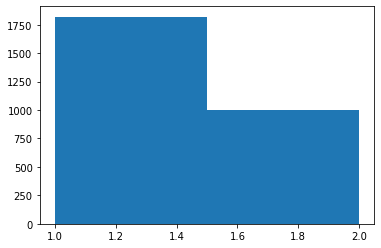

In [4]:
viral_threshold = 1e+06

def get_data_for_threshold(threshold):
    views = df['views']
    data = df.loc[:,['danceability','energy','key','loudness','mode','instrumentalness','liveness','valence','tempo','duration_ms']]
    targets = views.apply(np.digitize,bins=[0,threshold,views.max() +1])

    nrm = MinMaxScaler()
    regularized = nrm.fit_transform(data)
    return regularized, targets

X,y = get_data_for_threshold(viral_threshold)
y.hist(bins=2, grid=False)

In [5]:
compare_models(X,y)

Classifier                Pr   Re   Ac  
Baseline Classifier       0.49 0.49 0.54
Decision Tree             0.53 0.53 0.56
Random Forest             0.55 0.53 0.63


c:\users\georg\documents\msc-project\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\georg\documents\msc-project\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\georg\documents\msc-project\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\georg\documents\msc-project\venv\l

SVC                       0.34 0.5  0.64
Logistic Regression       0.52 0.5  0.65
Complement Naive Bayes    0.52 0.52 0.54


c:\users\georg\documents\msc-project\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\georg\documents\msc-project\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
model = optimize_lr(X,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [7]:
model.best_params_

{'C': 10, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}

In [8]:
estimator = model.best_estimator_
evaluate_model(estimator,X,y)

c:\users\georg\documents\msc-project\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\georg\documents\msc-project\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.522976359980621, 0.5012252747252747, 0.6460992907801419]